In [1]:
# Set the base directory for the Symbol Recognition System
base_directory = r"C:\Users\user\Desktop\Symbol Recognition System_CID Juba"

# Use this base_directory to access any files or subdirectories within this project

In [2]:
import os

# Set the current working directory to the project folder of CID Finger Print Recognition System Juba
os.chdir(r"C:\Users\user\Desktop\Symbol Recognition System_CID Juba")

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

C:\Users\User\AppData\Local\Temp\ipykernel_9188\1390016818.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
def data_info(direct):
    # List all files in the specified subdirectory within the 'data' directory.
    # Strip is used to remove any leading or trailing whitespace from the file names.
    files = [file.strip() for file in os.listdir('./data/' + direct)]

    filenames = []

    for file in files:
        # Extract the file name without its extension (assuming a 4-character extension like '.jpg' or '.png').
        # Also, extract the first character of the file name, which is assumed to be the class index or identifier.
        add = [file[:-4], file[0]]  # Returns a list with the file name and its index/class identifier.

        filenames.append(add)  # Append this list to the filenames list.

    return filenames  # Return the list of filename and index pairs.

In [6]:
# Import pandas library for data manipulation and analysis
import pandas as pd

# Function to create a DataFrame containing filenames and labels from a given directory
def data_info(direct):
    # List all files in the specified subdirectory within the 'data' directory
    files = [file.strip() for file in os.listdir('./data/' + direct)]

    filenames = []
    for file in files:
        # Assuming filenames follow a pattern where the first character is the label
        # Extract filename without extension and the first character as the label
        add = [file[:-4], file[0]]
        filenames.append(add)

    return filenames

# Generate lists of filenames and labels for training and test data
df_train = data_info(direct='train')
df_test = data_info(direct='test')

# Create DataFrames for training and test data with columns 'filename' and 'label'
train = pd.DataFrame(df_train, columns=['filename', 'label'])
test = pd.DataFrame(df_test, columns=['filename', 'label'])

# Note: In the CID Juba project, the labels in the test dataset might be placeholders.
# Actual labels may need to be assigned based on predictions from the recognition model.

# Display the first few entries of both training and test DataFrames
display(train.head(), test.head())


,filename,label
0,1 (1),1
1,1 (10),1
2,1 (2),1
3,1 (3),1
4,1 (4),1


,filename,label
0,1,1
1,10,1
2,11,1
3,12,1
4,13,1


In [7]:
print('train:', len(train))  # Display the number of entries in the training dataset
print('test:', len(test))    # Display the number of entries in the test dataset

train: 11
test: 80


In [8]:
def pixel_info(direct, df):
    pixels = []  # Initialize a list to store pixel data of images

    for file in list(df['filename']):  # Iterate over each filename in the DataFrame
        from PIL import Image  # Import the Image module from PIL (Python Imaging Library)
        im = Image.open('./data/' + direct + '/' + file + '.bmp')  # Open the image file

        pix = list(im.getdata())  # Get pixel values of the image and convert them into a list
        pixels.append(pix)  # Append the pixel data of the current image to the 'pixels' list

    # Create a DataFrame from the pixels list.
    # Each column represents one pixel. Assuming images are 144x144 pixels, there are 144**2 columns.
    df_pix = pd.DataFrame(pixels, columns=list(range(144**2)))

    return df_pix  # Return the DataFrame containing pixel data

In [9]:
train_pix = pixel_info('train', train)  # Extract pixel data for the training dataset and store it in train_pix
test_pix = pixel_info('test', test)     # Extract pixel data for the test dataset and store it in test_pix

In [10]:
display(train_pix.head(), test_pix.head())  # Display the first five rows of both the train_pix and test_pix DataFrames

,0,1,2,3,4,5,6,7,8,9,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


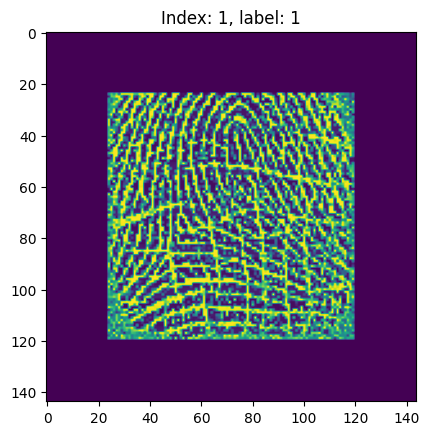

In [11]:
# Checking if the images have been correctly converted to pixels for the CID Juba project

idx = 1  # Index of the image to be visualized

# Reshape the pixel data at the specified index into a 144x144 array and convert it to integers
img = train_pix.loc[idx, '0':].values.reshape(144, 144).astype(int)

# Retrieve the label for the image at the specified index from the training dataset
label = train.loc[idx, 'label']

# Setting up the plot title with index and label information
plt.title('Index: %i, label: %s'%(idx, label))

# Displaying the image using matplotlib
plt.imshow(img)
plt.show()

Train-Test-Split

In [15]:
# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_pix.values, train['label'], test_size=0.3, random_state=42, shuffle=True, stratify=None)

# Reshaping and normalizing the training data for the CID Juba project
# X_train = X_train.reshape(-1, 144, 144, 1)  # Reshape training images to 144x144 with 1 channel
# X_train = X_train / 255  # Normalize pixel values to be between 0 and 1

# Reshaping and normalizing the validation data
# X_val = X_val.reshape(-1, 144, 144, 1)  # Reshape validation images to 144x144 with 1 channel
# X_val = X_val / 255  # Normalize pixel values

# Preparing and normalizing the test data
# X_test = test_pix.values.reshape(-1, 144, 144, 1)  # Reshape test images to 144x144 with 1 channel
# X_test = X_test / 255  # Normalize pixel values

# One-hot encoding the labels for training and validation datasets
# y_train_vec = np.zeros((len(y_train), 8))  # Initialize a zero matrix for one-hot encoded labels
# for i, digit in enumerate(y_train):
#     y_train_vec[int(i), int(digit)-1] = 1  # One-hot encode the training labels

# y_val_vec = np.zeros((len(y_val), 8))  # Initialize a zero matrix for one-hot encoded labels
# for i, digit in enumerate(y_val):
#     y_val_vec[int(i), int(digit)-1] = 1  # One-hot encode the validation labels

Catboost Classifier Model

In [16]:
# Importing CatBoostClassifier from the catboost library
from catboost import CatBoostClassifier

# Initializing the CatBoostClassifier
# Setting 'n_estimators' to 60 specifies the number of trees to build
# 'verbose' set to 20 means the training process will output logs every 20 iterations
cb = CatBoostClassifier(n_estimators=60, verbose=20)

# Training the CatBoostClassifier on the training dataset
# X_train contains the features, and y_train contains the corresponding labels
cb.fit(X_train, y_train)

CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/private/libs/target/target_converter.cpp:375: Target contains only one unique value

In [14]:
# Performing cross-validation to evaluate the CatBoostClassifier model
# 'K = 3' indicates that 3-fold cross-validation is used
# This process splits the training data into 3 parts, trains the model on 2 parts, and validates on the 3rd part
# Repeated for each combination to get a more robust evaluation of the model
scores = cross_val_score(cb, X_train, y_train, cv=3, scoring='accuracy')

# Printing the average accuracy and the 95% confidence interval of the accuracy estimate
# The mean and standard deviation of the scores are used to calculate the confidence interval
# This gives an idea of how the model's performance might vary with different splits of the training data
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\symbol\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\envs\symbol\Lib\site-packages\catboost\core.py", line 5100, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\User\anaconda3\envs\symbol\Lib\site-packages\catboost\core.py", line 2319, in _fit
    self._train(
  File "C:\Users\User\anaconda3\envs\symbol\Lib\site-packages\catboost\core.py", line 1723, in _train
    self._object._train(train_pool, test_pool, params, allow_clear_pool, init_model._object if init_model else None)
  File "_catboost.pyx", line 4645, in _catboost._CatBoost._train
  File "_catboost.pyx", line 4694, in _catboost._CatBoost._train
_catboost.CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/private/libs/target/target_converter.cpp:375: Target contains only one unique value


Save Model

In [51]:
import pickle  # Ensure pickle is imported before using it

# Saving the trained CatBoostClassifier model to a file
# The model is saved in the 'model' directory with the filename 'model_cb.pkl'
# 'wb' mode in open() means writing in binary format
with open('./model/model_cb.pkl', 'wb') as f:
    pickle.dump(cb, f)  # Use pickle to serialize and save the CatBoost model object 'cb' to the file

In [52]:
import pickle  # Ensure pickle is imported before using it

# Loading the previously saved CatBoostClassifier model from a file
# The model is loaded from the 'model' directory with the filename 'model_cb.pkl'
# 'rb' mode in open() means reading in binary format
with open('model/model_cb.pkl', 'rb') as f:
    best = pickle.load(f)  # Use pickle to deserialize and load the CatBoost model object into 'best'

In [53]:
# Using the loaded CatBoostClassifier model to make predictions on the validation dataset
val_pred = best.predict(X_val)

# Converting the predictions into a pandas DataFrame
# This can be useful for handling the predictions in a structured format, especially if further data manipulation is required
pred = pd.DataFrame(val_pred)

# Extracting the predictions from the DataFrame into a list
# This is done for easier access and manipulation of individual prediction results
pred = list(pred.iloc[:, 0])

In [54]:
# Converting the validation labels from the pandas Series to a list
# This is useful for easier manipulation and comparison with the prediction results
val = list(y_val)

In [55]:
from sklearn.metrics import accuracy_score  # Ensure accuracy_score is imported from sklearn.metrics

# Calculating and printing the accuracy of the model's predictions on the validation set
# 'accuracy_score' compares the list of predictions 'pred' with the actual labels 'val'
# The accuracy is formatted as a percentage with two decimal places
print("Accuracy: %0.2f" % (accuracy_score(pred, val)))

Accuracy: 1.00


In [56]:
from sklearn.metrics import classification_report  # Ensure classification_report is imported from sklearn.metrics

# Generating and printing a detailed classification report
# This report includes key metrics like precision, recall, and F1-score for each class
# 'pred' contains the model's predictions and 'val' contains the actual labels
print(classification_report(pred, val))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         2

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [23]:
# Test dataset prediction
test_pred = best.predict(test_pix.values)

In [26]:
# Ensure test_pred is 1D
test_pred = test_pred.ravel()  # Adjust this line according to the actual structure of test_pred

# Assign to DataFrame
test['label'] = test_pred

# Convert 'filename' to numeric
test['filename'] = pd.to_numeric(test["filename"])

# Display the DataFrame
test


,filename,label
0,1,7
1,10,3
2,11,5
3,12,2
4,13,5
...,...,...
75,78,1
76,79,7
77,8,5
78,80,3


In [57]:
# Sorting the test dataset based on the 'filename' column in ascending order
# This is useful for organizing the data in a consistent order, especially for comparison or presentation purposes
result = test.sort_values(by=['filename'], ascending=True)

# Displaying the first few rows of the sorted dataset
# This helps in quickly verifying the sorting and provides a snapshot of the dataset
result.head()

,filename,label
0,1,1
1,10,1
2,11,1
3,12,1
4,13,1


In [59]:
# Saving the sorted test dataset to a CSV file
# The file is stored in the 'result' directory with the filename 'result_cb.csv'
# 'index=False' is specified to prevent writing row indices to the CSV file
result.to_csv('./result/result_cb.csv', index=False)

In [60]:
# Reloading the saved CSV file to verify it was saved correctly
# This is a good practice to ensure data integrity after saving
result = pd.read_csv('./result/result_cb.csv')

# Displaying the first few rows of the reloaded dataset
# This helps in quickly verifying the data format and the successful loading of the file
result.head()

,filename,label
0,1,1
1,10,1
2,11,1
3,12,1
4,13,1


In [61]:
# Importing the Counter class from the collections module
from collections import Counter

# Counting the occurrences of each class in the 'label' column of the result DataFrame
# This is useful for understanding the distribution of different classes in the dataset
Counter(result['label'])

Counter({1: 11, 2: 11, 3: 11, 4: 11, 5: 11, 6: 11, 7: 11, 8: 2, 9: 1})